# 3 - Histograms

In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
from skimage import exposure 
from __future__ import print_function
import imutils
import numpy as np
import argparse
import glob
import cv2

In [2]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

##  1 -  Image Histograms


[Reference](https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/?_ga=2.160376189.1722658714.1657194359-258974203.1656952021)

- Histograms are prevalent in nearly every aspect of computer vision.

We use grayscale histograms for thresholding. We use histograms for white balancing. We use color histograms for object tracking in images, such as with the CamShift algorithm.
- We use color histograms as features — include color histograms in multiple dimensions.
- In an abstract sense, we use histograms of image gradients to form the HOG and SIFT descriptors.
- Even the extremely popular bag-of-visual-words representation used in image search engines and machine learning is a histogram as well!

why are histograms so useful?
- histograms capture the frequency distribution of a set of data. And it turns out that examining these frequency distributions is a very nice way to build simple image processing techniques … along with very powerful machine learning algorithms.

### What is an image histogram?
A histogram represents the distribution of pixel intensities (whether color or grayscale) in an image. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. 
 - We are going to assume a RGB color space in this example, so these pixel values will be in the range of 0 to 255.
 - When plotting the histogram, the x-axis serves as our “bins.” If we construct a histogram with 256 bins, then we are effectively counting the number of times each pixel value occurs.
 - In contrast, if we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range [0, 128] or [128, 255].
 - The number of pixels binned to the x-axis value is then plotted on the y-axis.
 
We will be using the cv2.calcHist function to build our histograms. Before we get into any code examples, let’s quickly review the function:

                          cv2.calcHist(images, channels, mask, histSize, ranges)
   - images: This is the image that we want to compute a histogram for. Wrap it as a list: [myImage] .
   - channels: A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0, 1, 2].
   - mask: If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None.
   - histSize: This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32, 32, 32].
   - ranges: The range of possible pixel values. Normally, this is [0, 256] (that is not a typo — the ending range of the cv2.calcHist function is non-inclusive so you’ll want to provide a value of 256 rather than 255) for each channel, but if you are using a color space other than RGB [such as HSV], the ranges might be different.)
   
By utilizing masks, we are able to apply our computation only to the specific regions of the image that interest us 

In [3]:
# Creating a grayscale
def plot_histogram(image, title, mask=None):
    # split the image into its respective channels, then initialize
    # the tuple of channel names along with our figure for plotting
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

    plt.show()

In [4]:
args = {
    "image": "images/beach.png"
}

In [5]:
# load the input image and convert it to grayscale
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
# compute a grayscale histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

(0.0, 256.0)

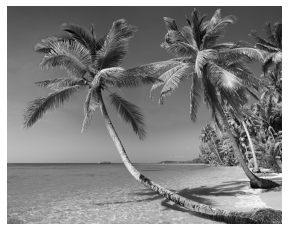

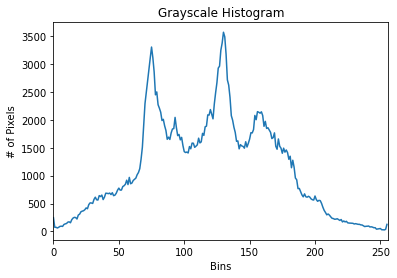

In [7]:
# matplotlib expects RGB images so convert and then display the image
# with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

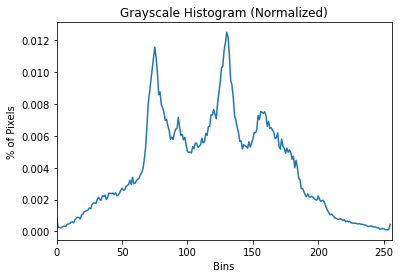

In [8]:
# normalize the histogram
hist /= hist.sum()

# plot the normalized histogram
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [9]:
# load the input image from disk
image = cv2.imread(args["image"])

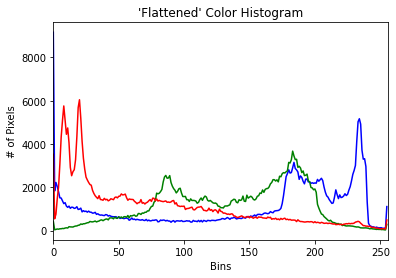

In [10]:
# split the image into its respective channels, then initialize the
# tuple of channel names along with our figure for plotting
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

2D histogram shape: (32, 32), with 1024 values


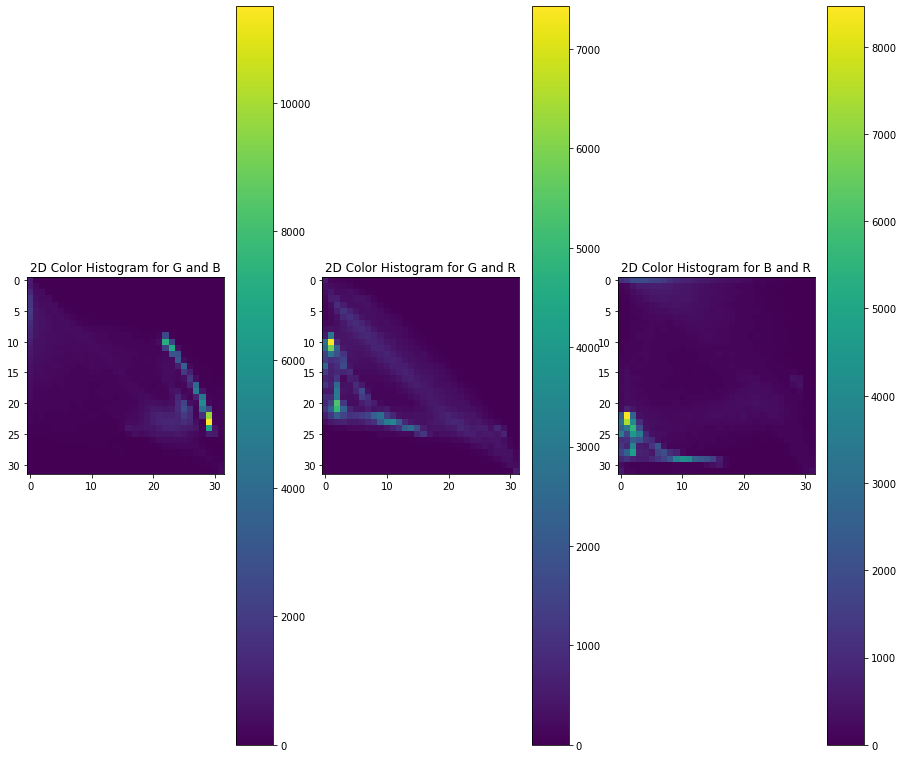

In [11]:
# create a new figure and then plot a 2D color histogram for the
# green and blue channels
fig = plt.figure(figsize=(15, 25))
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

In [12]:
# our 2D histogram could only take into account 2 out of the 3
# channels in the image so now let's build a 3D color histogram
# (utilizing all channels) with 8 bins in each direction -- we
# can't plot the 3D histogram, but the theory is exactly like
# that of a 2D histogram, so we'll just show the shape of the
# histogram
hist = cv2.calcHist([image], [0, 1, 2],
    None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


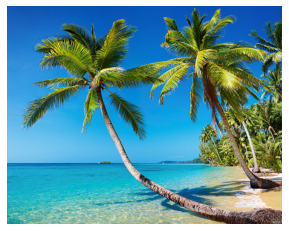

In [13]:
# display the original input image
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))

# show our plots
plt.show()

### Computing image histograms for masked regions with OpenCV

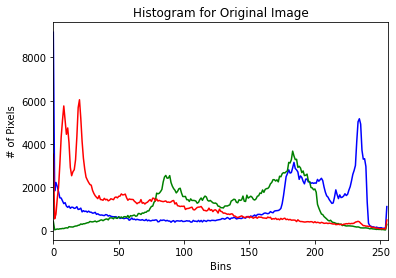

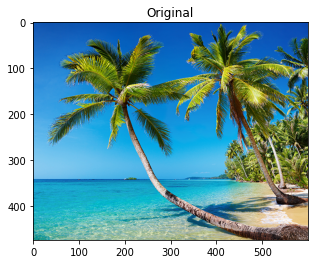

In [14]:
# load the beach image and plot a histogram for it
image = cv2.imread("images/beach.png")
plot_histogram(image, "Histogram for Original Image")
plt_imshow("Original", image)

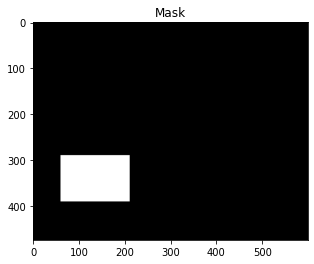

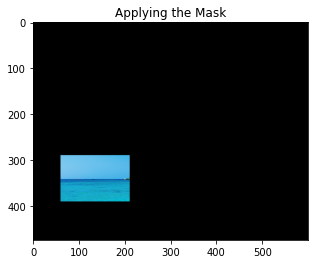

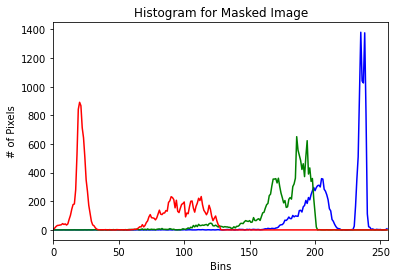

In [15]:
# construct a mask for our image; our mask will be *black* for regions
# we want to *ignore* and *white* for regions we want to *examine*
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 290), (210, 390), 255, -1)
plt_imshow("Mask", mask)

# display the masked region
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Applying the Mask", masked)

# compute a histogram for our image, but we'll only include pixels in
# the masked region
plot_histogram(image, "Histogram for Masked Image", mask=mask)

# show our plots
plt.show()

##  2 - Histogram and adaptive histogram equalization


[Reference](https://pyimagesearch.com/2021/02/01/opencv-histogram-equalization-and-adaptive-histogram-equalization-clahe/?_ga=2.173934819.1722658714.1657194359-258974203.1656952021)

Histogram equalization is a basic image processing technique that adjusts the global contrast of an image by updating the image histogram’s pixel intensity distribution. Doing so enables areas of low contrast to obtain higher contrast in the output image.

Histogram equalization works by:
1. Computing a histogram of image pixel intensities
2. Evenly spreading out and distributing the most frequent pixel values (i.e., the ones with the largest counts in the histogram)
3. Giving a linear trend to the cumulative distribution function (CDF)

- we can improve histogram equalization by applying an algorithm called Contrast Limited Adaptive Histogram Equalization (CLAHE), resulting in higher quality output images.
- You’ll typically see histogram equalization applied to X-ray scans and CT scans to improve the radiograph’s contrast. Doing so helps doctors and radiologists better interpret the scans and make an accurate diagnosis.

### histogram equalization?
Histogram equalization is a basic image processing technique that can improve an image’s overall contrast.

Applying histogram equalization starts by computing the histogram of pixel intensities in an input grayscale/single-channel image:
 - Notice how our histogram has numerous peaks, indicating there are a good number of pixels binned to those respective buckets. With histogram equalization, our goal is to spread these pixels to buckets that don’t have as many pixels binned to them.
 - Mathematically, what this means is that we’re attempting to apply a linear trend to our cumulative distribution function (CDF).
 -  input image’s contrast will improve significantly but at the expense of also boosting the contrast of the noise in the input image.
 
*Is it possible to improve image contrast without also boosting noise at the same time?*
-   *“Yes,”* you just need to apply adaptive histogram equalization.
-   The downside is that adaptive histogram equalization is by definition more computationally complex (but given modern hardware, both implementations are still quite speedy).

OpenCV includes implementations of both basic histogram equalization and adaptive histogram equalization through the following two functions:
 - cv2.equalizeHist
 - cv2.createCLAHE
 
Performing adaptive histogram equalization requires that we:
1. Convert the input image to grayscale/extract a single channel from it
2. Instantiate the CLAHE algorithm using cv2.createCLAHE
3. Call the .apply method on the CLAHE object to apply histogram equalization


**Note:** When performing histogram equalization with OpenCV, we must supply a grayscale/single-channel image. If we try to pass in a multi-channel image, OpenCV will throw an error. To perform histogram equalization on a multi-channel image, you would need to (1) split the image into its respective channels, (2) equalize each channel, and (3) merge the channels back together.

In [16]:
 args = {
    "image": "images/dog.png"
}

In [17]:
# load the input image from disk and convert it to grayscale
print("[INFO] loading input image...")
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply histogram equalization
print("[INFO] performing histogram equalization...")
equalized = cv2.equalizeHist(gray)

[INFO] loading input image...
[INFO] performing histogram equalization...


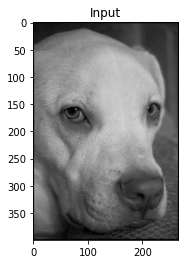

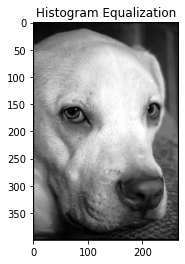

In [18]:
# show the original grayscale image and equalized image
plt_imshow("Input", gray)
plt_imshow("Histogram Equalization", equalized)

### Implementing adaptive histogram equalization with OpenCV

In [19]:
args = {
    "image": "images/dog.png",
    "clip": 2.0,
    "tile": 8
}

In [20]:
# load the input image from disk and convert it to grayscale
print("[INFO] loading input image...")
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
print("[INFO] applying CLAHE...")
#clip-limit is the contrast limit for localized changes in contrast. A clip-limit of 2 to 3 is a good starting place
clahe = cv2.createCLAHE(clipLimit=args["clip"],
    tileGridSize=(args["tile"], args["tile"]))
equalized = clahe.apply(gray)

[INFO] loading input image...
[INFO] applying CLAHE...


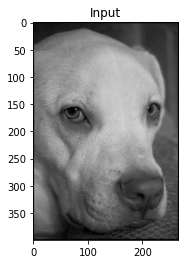

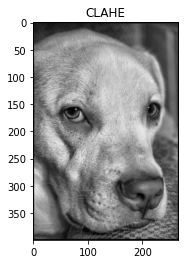

In [21]:
# show the original grayscale image and CLAHE output image
plt_imshow("Input", gray)
plt_imshow("CLAHE", equalized)

##  3 - Histogram Matching


[Reference](https://pyimagesearch.com/2021/02/08/histogram-matching-with-opencv-scikit-image-and-python/?_ga=2.194390381.1722658714.1657194359-258974203.1656952021)


#### *What if you wanted to match the contrast or color distribution of two images automatically?*
For example, suppose we have an input image and a reference image. Our goal is to:
 1. Compute histograms for each image
 2. Take the reference image histogram
 3. Update the pixel intensity values in the input image using the reference histogram, such that they match
 
Histogram matching is beneficial when applying image processing pipelines to images captured in different lighting conditions, thereby creating a “normalized” representation of images, regardless of the lighting conditions they were captured in (with reasonable expectations set on how much the lighting conditions change, of course).

Histogram matching can be used as a normalization technique in an image processing pipeline as a form of color correction and color matching, thereby allowing you to obtain a consistent, normalized representation of images, even if lighting conditions change.


### What is histogram matching?
Histogram matching can best be thought of as a “transformation.” Our goal is to take an input image (the “source”) and update its pixel intensities such that the distribution of the input image histogram matches the distribution of a reference image.

While the input image’s actual contents do not change, the pixel distribution does, thereby adjusting the illumination and contrast of the input image based on the distribution of the reference image.

Applying histogram matching allows us to obtain interesting aesthetic results.

we can use histogram matching as a form of basic color correction/color constancy, allowing us to build better, more reliable image processing pipelines without leveraging complex, computationally expensive machine learning and deep learning algorithms. 

In [22]:
args = {
    "source": "images/empire_state_cloudy.png",
    "reference": "images/empire_state_sunset.png"
}

[INFO] loading source and reference images...
[INFO] performing histogram matching...


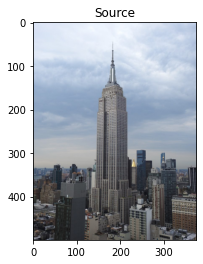

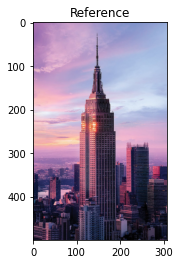

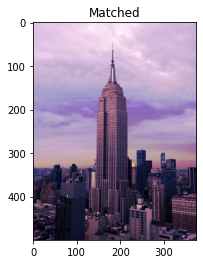

In [23]:
# load the source and reference images
print("[INFO] loading source and reference images...")
src = cv2.imread(args["source"])
ref = cv2.imread(args["reference"])

# determine if we are performing multichannel histogram matching
# and then perform histogram matching itself
print("[INFO] performing histogram matching...")
multi = True if src.shape[-1] > 1 else False
matched = exposure.match_histograms(src, ref, channel_axis=-1)

# show the output images
plt_imshow("Source", src)
plt_imshow("Reference", ref)
plt_imshow("Matched", matched)

Text(0.5, 1.0, 'Matched')

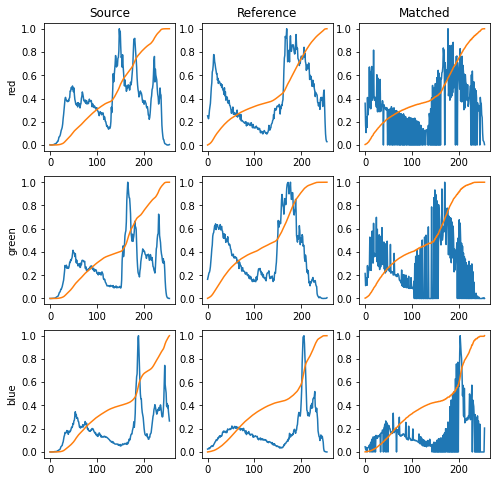

In [24]:
# construct a figure to display the histogram plots for each channel
# before and after histogram matching was applied
(fig, axs) =  plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

# loop over our source image, reference image, and output matched
# image
for (i, image) in enumerate((src, ref, matched)):
    # convert the image from BGR to RGB channel ordering
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # loop over the names of the channels in RGB order
    for (j, color) in enumerate(("red", "green", "blue")):
        # compute a histogram for the current channel and plot it
        (hist, bins) = exposure.histogram(image[..., j],
            source_range="dtype")
        axs[j, i].plot(bins, hist / hist.max())

        # compute the cumulative distribution function for the
        # current channel and plot it
        (cdf, bins) = exposure.cumulative_distribution(image[..., j])
        axs[j, i].plot(bins, cdf)

        # set the y-axis label of the current plot to be the name
        # of the current color channel
        axs[j, 0].set_ylabel(color)
  
# set the axes titles
axs[0, 0].set_title("Source")
axs[0, 1].set_title("Reference")
axs[0, 2].set_title("Matched")

## 4 - Gamma Correction


[Reference](https://pyimagesearch.com/2015/10/05/opencv-gamma-correction/?_ga=2.194390381.1722658714.1657194359-258974203.1656952021)

The human eye perceives color and luminance differently than the sensor on your smartphone or digital camera. 
- When twice the number of photons hit the sensor of a digital camera, it receives twice the signal (a linear relationship). However, that’s not how our human eyes work. Instead, we perceive double the amount of light as only a fraction brighter (a non-linear relationship)! Furthermore, our eyes are also much more sensitive to changes in dark tones than brighter tones (another non-linear relationship).
- In order to account for this we can apply gamma correction, a translation between the sensitivity of our eyes and sensors of a camera.

Gamma correction is also known as the Power Law Transform.
- our image pixel intensities must be scaled from the range [0, 255] to [0, 1.0].
- we obtain our output gamma corrected image by applying the following equation:
                    
                    O = I ^ (1 / G)
      Where I is our input image and G is our gamma value. The output image O is then scaled back to the range [0, 255].
- Gamma values < 1 will shift the image towards the darker end of the spectrum while gamma values > 1 will make the image appear lighter. A gamma value of G=1 will have no affect on the input image.

In [25]:
# Gamma Correction
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [26]:
args = {
    "image": "images/example_02.png"
}

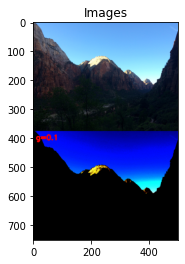

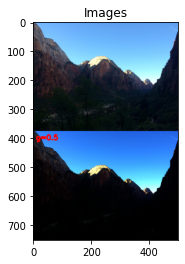

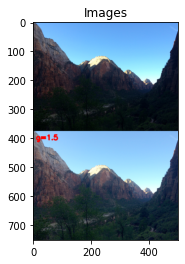

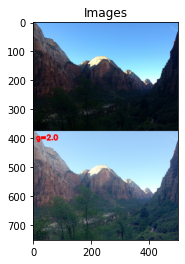

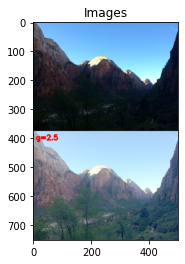

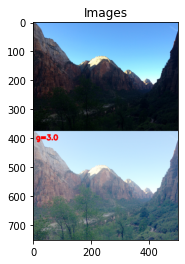

In [27]:
# load the original image
original = cv2.imread(args["image"])

# loop over various values of gamma
for gamma in np.arange(0.0, 3.5, 0.5):
    # ignore when gamma is 1 (there will be no change to the image)
    if gamma == 1:
        continue

    # apply gamma correction and show the images
    gamma = gamma if gamma > 0 else 0.1
    adjusted = adjust_gamma(original, gamma=gamma)
    cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
    plt_imshow("Images", np.vstack([original, adjusted]))

## 5 - Automatic Color Correction

[Reference](https://pyimagesearch.com/2021/02/15/automatic-color-correction-with-opencv-and-python/?_ga=2.194390381.1722658714.1657194359-258974203.1656952021)

[Aruco markers](https://pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/)

Using a color correction/color constancy card, we can:
- Detect the color correction card in an input image
- Compute the histogram of the card, which contains gradated colors of varying colors, hues, shades, blacks, whites, and grays
- Apply histogram matching from the color card to another image, thereby attempting to achieve color constancy

Essentially, with controlled environments, we can get away with basic image processing algorithms that are far easier to implement. The catch is that we need safe assumptions on our lighting conditions. Color correction and white balancing help us achieve that.

- four_point_transform: Applies a perspective transform to obtain a top-down, bird’s-eye view of the input color matching card. See the following tutorial for an example of using this function.
- exposure: Contains the histogram matching function from scikit-image.

In [28]:
from imutils.perspective import four_point_transform
def find_color_card(image):
    # load the ArUCo dictionary, grab the ArUCo parameters, and
    # detect the markers in the input image
    arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)
    arucoParams = cv2.aruco.DetectorParameters_create()
    (corners, ids, rejected) = cv2.aruco.detectMarkers(image,
        arucoDict, parameters=arucoParams)

    # try to extract the coordinates of the color correction card
    try:
        # otherwise, we've found the four ArUco markers, so we can
        # continue by flattening the ArUco IDs list
        ids = ids.flatten()

        # extract the top-left marker
        i = np.squeeze(np.where(ids == 923))
        topLeft = np.squeeze(corners[i])[0]

        # extract the top-right marker
        i = np.squeeze(np.where(ids == 1001))
        topRight = np.squeeze(corners[i])[1]

        # extract the bottom-right marker
        i = np.squeeze(np.where(ids == 241))
        bottomRight = np.squeeze(corners[i])[2]

        # extract the bottom-left marker
        i = np.squeeze(np.where(ids == 1007))
        bottomLeft = np.squeeze(corners[i])[3]

    # we could not find color correction card, so gracefully return
    except:
        return None

    # build our list of reference points and apply a perspective
    # transform to obtain a top-down, birds-eye-view of the color
    # matching card
    cardCoords = np.array([topLeft, topRight,
        bottomRight, bottomLeft])
    card = four_point_transform(image, cardCoords)

    # return the color matching card to the calling function
    return card

In [29]:
args = {
    "reference": "images/reference.jpg",
    "input": "images/examples-color-correction/01.jpg"
}

[INFO] loading images...


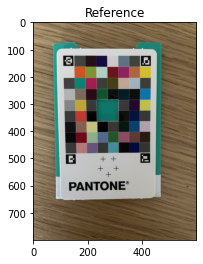

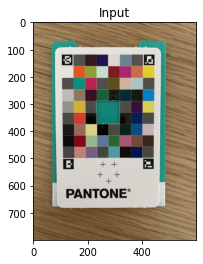

In [30]:
# load the reference image and input images from disk
print("[INFO] loading images...")
ref = cv2.imread(args["reference"])
image = cv2.imread(args["input"])

# resize the reference and input images
ref = imutils.resize(ref, width=600)
image = imutils.resize(image, width=600)

# display the reference and input images to our screen
plt_imshow("Reference", ref)
plt_imshow("Input", image)

In [31]:
# find the color matching card in each image
print("[INFO] finding color matching cards...")
refCard = find_color_card(ref)
imageCard = find_color_card(image)

# if the color matching card is not found in either the reference
# image or the input image, gracefully exit
if refCard is None or imageCard is None:
    print("[INFO] could not find color matching card in both images")

[INFO] finding color matching cards...


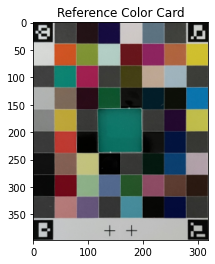

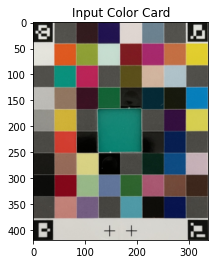

[INFO] matching images...


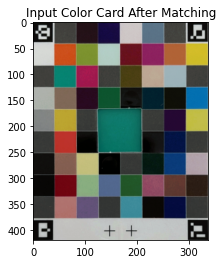

In [32]:
# show the color matching card in the reference image and input image,
# respectively
plt_imshow("Reference Color Card", refCard)
plt_imshow("Input Color Card", imageCard)

# apply histogram matching from the color matching card in the
# reference image to the color matching card in the input image
print("[INFO] matching images...")
imageCard = exposure.match_histograms(imageCard, refCard,
    channel_axis=-1)

# show our input color matching card after histogram matching
plt_imshow("Input Color Card After Matching", imageCard)

## 6 - detecting low contrast images


[Reference](https://pyimagesearch.com/2021/01/25/detecting-low-contrast-images-with-opencv-scikit-image-and-python/?_ga=2.174481634.1722658714.1657194359-258974203.1656952021)

In [33]:
from skimage.exposure import is_low_contrast
from imutils.paths import list_images

In [34]:
args = {
    "input": "images/examples",
    "thresh": 0.35
}

[INFO] processing image 1/3


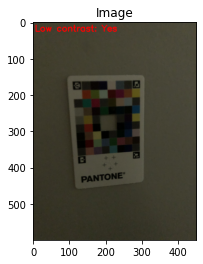

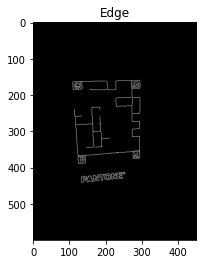

[INFO] processing image 2/3


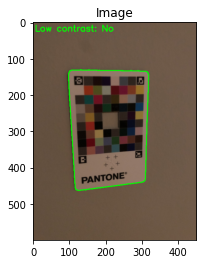

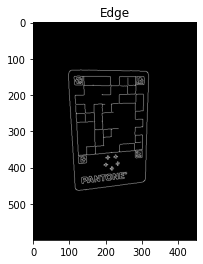

[INFO] processing image 3/3


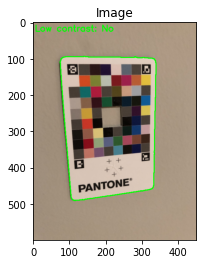

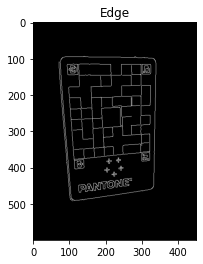

In [35]:
# grab the paths to the input images
imagePaths = sorted(list(list_images(args["input"])))

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # load the input image from disk, resize it, and convert it to
    # grayscale
    print("[INFO] processing image {}/{}".format(i + 1,
        len(imagePaths)))
    image = cv2.imread(imagePath)
    image = imutils.resize(image, width=450)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # blur the image slightly and perform edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 30, 150)

    # initialize the text and color to indicate that the input image
    # is *not* low contrast
    text = "Low contrast: No"
    color = (0, 255, 0)

    # check to see if the image is low contrast
    if is_low_contrast(gray, fraction_threshold=args["thresh"]):
        # update the text and color
        text = "Low contrast: Yes"
        color = (0, 0, 255)

    # otherwise, the image is *not* low contrast, so we can continue
    # processing it
    else:
        # find contours in the edge map and find the largest one,
        # which we'll assume is the outline of our color correction
        # card
        cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # draw the largest contour on the image
        cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

    # draw the text on the output image
    cv2.putText(image, text, (5, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
        color, 2)

    # show the output image and edge map
    plt_imshow("Image", image)
    plt_imshow("Edge", edged)

In [36]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--input", type=str, default="",
# 	help="optional path to video file")
# ap.add_argument("-t", "--thresh", type=float, default=0.35,
# 	help="threshold for low contrast")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "input": "example_video.mp4",
    "thresh": 0.35,
    "output": "output.avi"
}

In [37]:
# grab a pointer to the input video stream and and initialize pointer 
# to output file
print("[INFO] accessing video stream...")
vs = cv2.VideoCapture(args["input"] if args["input"] else 0)
writer = None

# loop over frames from the video stream
while True:
    # read a frame from the video stream
    (grabbed, frame) = vs.read()

    # if the frame was not grabbed then we've reached the end of
    # the video stream so exit the script
    if not grabbed:
        print("[INFO] no frame read from stream - exiting")
        break

    # resize the frame, convert it to grayscale, blur it, and then
    # perform edge detection
    frame = imutils.resize(frame, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 30, 150)

    # initialize the text and color to indicate that the current
    # frame is *not* low contrast
    text = "Low contrast: No"
    color = (0, 255, 0)

    # check to see if the frame is low contrast, and if so, update
    # the text and color
    if is_low_contrast(gray, fraction_threshold=args["thresh"]):
        text = "Low contrast: Yes"
        color = (0, 0, 255)

    # otherwise, the frame is *not* low contrast, so we can continue
    # processing it
    else:
        # find contours in the edge map and find the largest one,
        # which we'll assume is the outline of our color correction
        # card
        cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # draw the largest contour on the frame
        cv2.drawContours(frame, [c], -1, (0, 255, 0), 2)

    # draw the text on the output frame
    cv2.putText(frame, text, (5, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                color, 2)

    # stack the output frame and edge map next to each other
    output = np.dstack([edged] * 3)
    output = np.hstack([frame, output])

    # if the video writer is None *AND* we are supposed to write
    # the output video to disk initialize the writer
    if writer is None and args["output"] is not None:
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter(args["output"], fourcc, 20,
            (output.shape[1], output.shape[0]), True)
  
    # if the writer is not None, write the frame to disk
    if writer is not None:
        writer.write(output)
  
vs.release()
vs.release()

# check to see if the video writer point needs to be released
if writer is not None:
    writer.release()

[INFO] accessing video stream...
[INFO] no frame read from stream - exiting


In [38]:
#!ffmpeg -i "output.avi" output.mp4

### Low contrast detection through webcam from notebook

In [39]:
from skimage.exposure import is_low_contrast
import numpy as np
import argparse
import imutils
import cv2

# construct the argument parser and parse the arguments
args = {
    "thresh": 0.35,
}

# grab a pointer to the input video stream
print("[INFO] accessing video stream...")
vs = cv2.VideoCapture(0)

# loop over frames from the video stream
while True:
    # read a frame from the video stream
    (grabbed, frame) = vs.read()

    # if the frame was not grabbed then we've reached the end of
    # the video stream so exit the script
    if not grabbed:
        print("[INFO] no frame read from stream - exiting")
        break

    # resize the frame, convert it to grayscale, blur it, and then
    # perform edge detection
    frame = imutils.resize(frame, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 30, 150)

    # initialize the text and color to indicate that the current
    # frame is *not* low contrast
    text = "Low contrast: No"
    color = (0, 255, 0)

    # check to see if the frame is low contrast, and if so, update
    # the text and color
    if is_low_contrast(gray, fraction_threshold=args["thresh"]):
        text = "Low contrast: Yes"
        color = (0, 0, 255)

    # otherwise, the frame is *not* low contrast, so we can continue
    # processing it
    else:
        # find contours in the edge map and find the largest one,
        # which we'll assume is the outline of our color correction card
        cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # draw the largest contour on the frame
        cv2.drawContours(frame, [c], -1, (0, 255, 0), 2)

    # draw the text on the output frame
    cv2.putText(frame, text, (5, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8,color, 2)

    # stack the output frame and edge map next to each other
    output = np.dstack([edged] * 3)
    output = np.hstack([frame, output])

    # show the output to our screen
    cv2.imshow("Output", output)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        vs.release()
        cv2.destroyAllWindows() 
        cv2.waitKey(1)
        break


[INFO] accessing video stream...


### Gamma Correction through webcam from notebook

In [40]:
import numpy as np
import argparse
import imutils
import cv2

# construct the argument parser and parse the arguments
args = {
    "gamma": 1.35,
}

def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

# grab a pointer to the input video stream
print("[INFO] accessing video stream...")
vs = cv2.VideoCapture(0)

# loop over frames from the video stream
while True:
    # read a frame from the video stream
    (grabbed, frame) = vs.read()

    # if the frame was not grabbed then we've reached the end of
    # the video stream so exit the script
    if not grabbed:
        print("[INFO] no frame read from stream - exiting")
        break

    # resize the frame, convert it to grayscale, blur it, and then
    # perform edge detection
    frame = imutils.resize(frame, width=400)
    adj=[]
    for gamma in np.arange(0.0, 3.5, 0.5):
        if gamma == 1:
            continue
        gamma = gamma if gamma > 0 else 0.1
        adjusted = adjust_gamma(frame, gamma=gamma)
        cv2.putText(adjusted, "g={}".format(gamma), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
        adj.append(adjusted)
    
    # stack the output frame and edge map next to each other
    output = np.dstack([adjusted] * 4)
    cv2.putText(frame, "g={}".format(1), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
    output = np.hstack([np.vstack([adj[0], adj[2]]),np.vstack([adj[1],adj[3]]),np.vstack([frame,adj[4]])])

    # show the output to our screen
    cv2.imshow("Output", output)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        vs.release()
        cv2.destroyAllWindows() 
        cv2.waitKey(1)
        break


[INFO] accessing video stream...
